In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [2]:
# import a dataset
diamonds_data = sm.datasets.get_rdataset("diamonds", "ggplot2")
diamonds = diamonds_data.data

In [3]:
print(diamonds_data.__doc__)

.. container::

   .. container::

      ======== ===============
      diamonds R Documentation
      ======== ===============

      .. rubric:: Prices of over 50,000 round cut diamonds
         :name: prices-of-over-50000-round-cut-diamonds

      .. rubric:: Description
         :name: description

      A dataset containing the prices and other attributes of almost
      54,000 diamonds. The variables are as follows:

      .. rubric:: Usage
         :name: usage

      ::

         diamonds

      .. rubric:: Format
         :name: format

      A data frame with 53940 rows and 10 variables:

      price
         price in US dollars ($326–$18,823)

      carat
         weight of the diamond (0.2–5.01)

      cut
         quality of the cut (Fair, Good, Very Good, Premium, Ideal)

      color
         diamond colour, from D (best) to J (worst)

      clarity
         a measurement of how clear the diamond is (I1 (worst), SI2,
         SI1, VS2, VS1, VVS2, VVS1, IF (best))

      x

In [19]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.80,57.00,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.30,57.00,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.90,55.00,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.10,61.00,337,3.87,3.78,2.49
...,...,...,...,...,...,...,...,...,...,...


# dimamonds 데이터 EDA

## Categorical type로 변형하고, order 추가

In [62]:
# cut, color, clarity 모두 Categorical type으로 변형
diamonds["cut"] = pd.Categorical(
    diamonds["cut"],
    categories=["Fair", "Good", "Very Good", "Premium", "Ideal"],
    ordered=True
)
diamonds["color"] = pd.Categorical(
    diamonds["color"],
    categories=["D", "E", "F", "G", "H", "I", "J"],
    ordered=True
)
diamonds["clarity"] = pd.Categorical(
    diamonds["clarity"],
    categories=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],
    ordered=True
)

## 다이아몬드의 무게(캐럿, carat)의 분포 확인 (Hist로)
### 생각해볼 수 있는 질문
#### 어떤 값들이 가장 흔하게 나오며, 왜 그런가?
#### 어떤 값들이 가장 드물며, 왜 그런가?
#### 어떤 특이한 패턴들이 있다면, 왜 그런가?

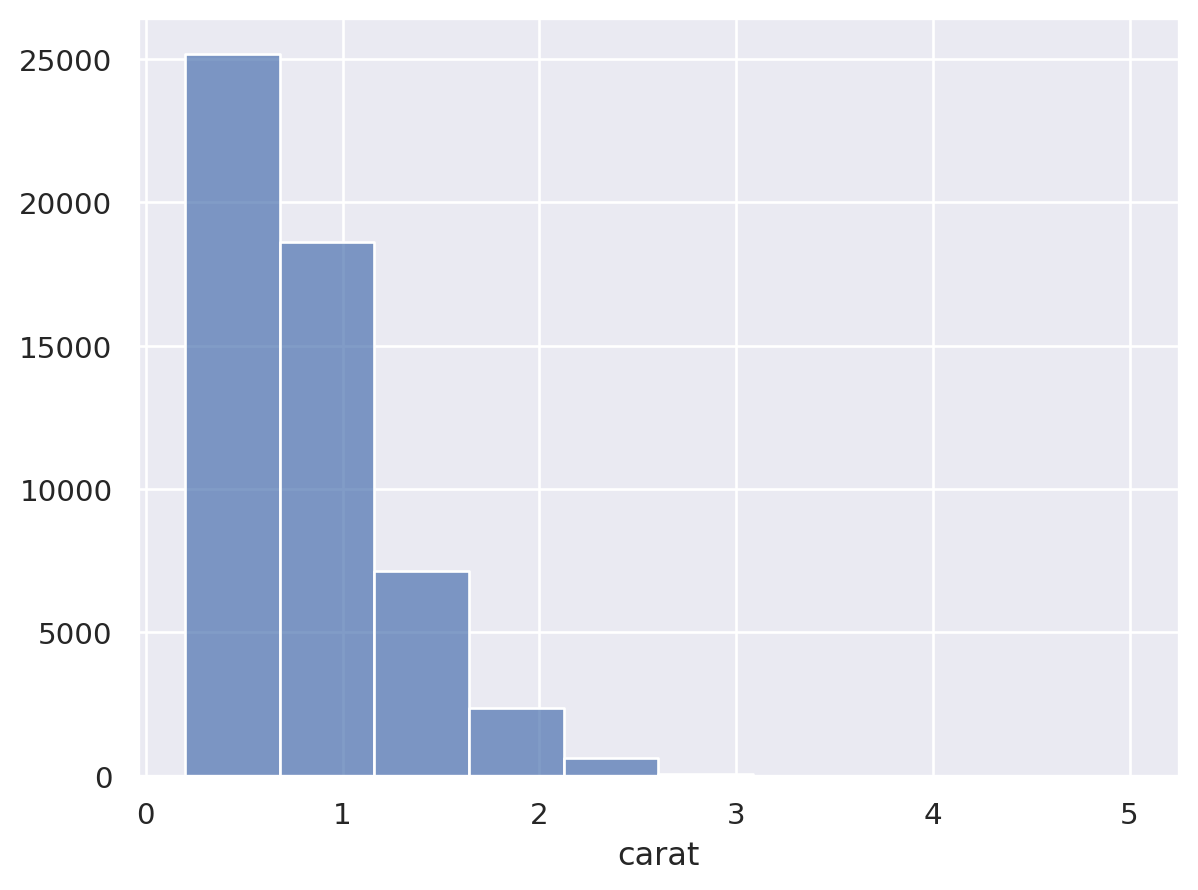

In [63]:
(
    so.Plot(diamonds, x="carat")
    .add(so.Bars(), so.Hist(binwidth=.5)) # binwidth 0.5면 carat 0.5 단위로 --> 0.1로 하면 더 크게 변동성이 있다.
)

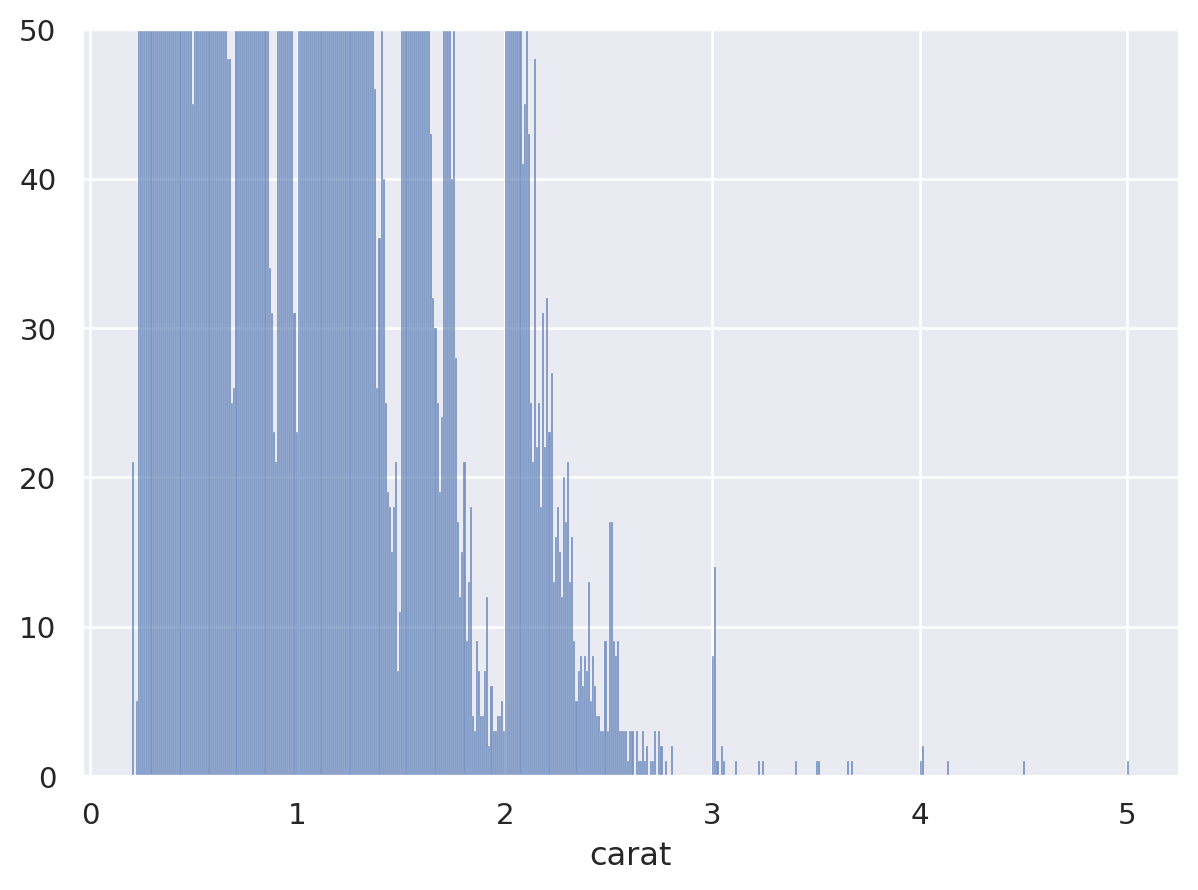

In [64]:
# Zoom-in
(
    so.Plot(diamonds, x="carat")
    .add(so.Bars(), so.Hist(binwidth=.01))
    .limit(y=(0, 50)) # y로 확대를 하고 싶을 때
)

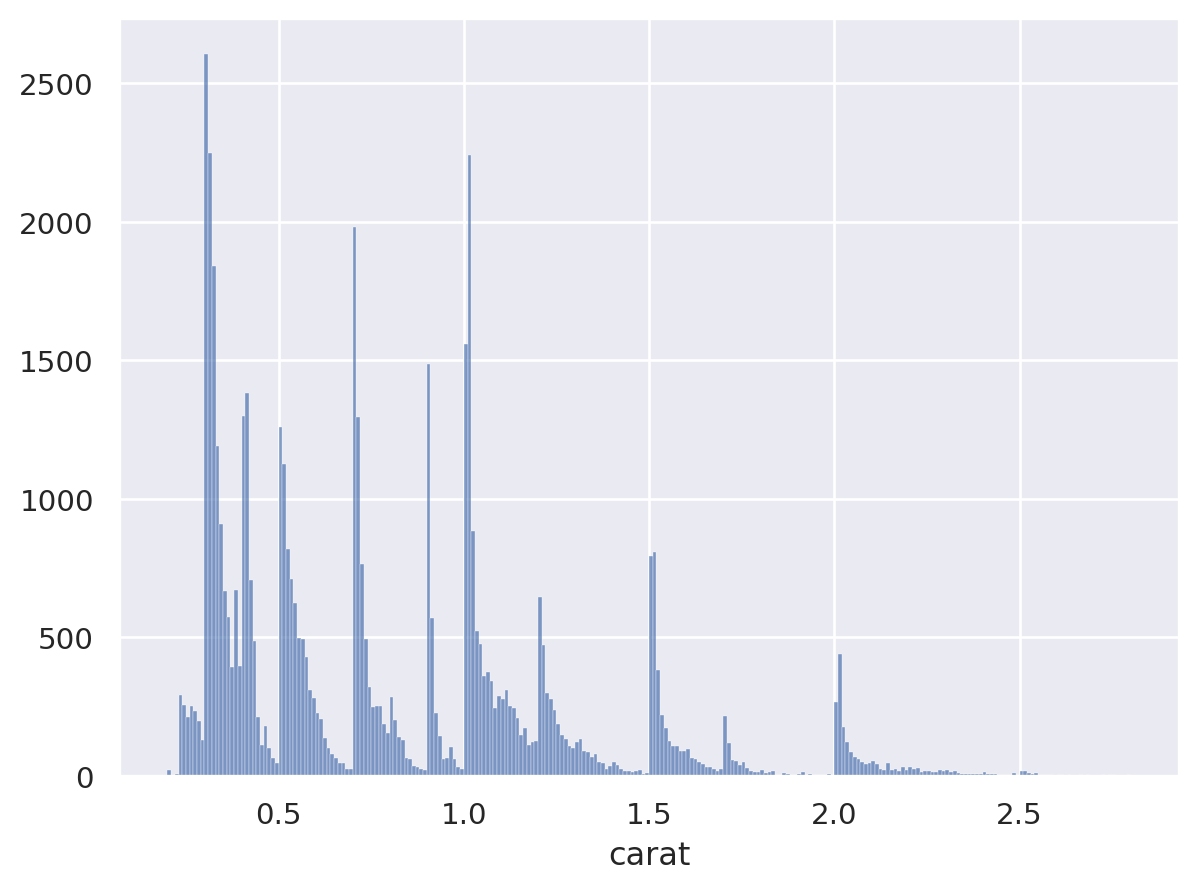

In [65]:
(
    so.Plot(diamonds.query('carat < 3'), x= "carat")
    .add(so.Bars(),so.Hist(binwidth=.01))
)

In [66]:
pd.options.display.max_rows = 0
diamonds.value_counts("carat").head(15)

carat
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
1.00    1558
0.90    1485
0.41    1382
0.40    1299
0.71    1294
0.50    1258
0.33    1189
0.51    1127
0.34     910
1.02     883
Name: count, dtype: int64

In [67]:
# 0.99 캐럿과 1 캐럿 개수 차이
print(diamonds[diamonds["carat"]==0.99].shape)
print(diamonds[diamonds["carat"]==1].shape)

(23, 10)
(1558, 10)


### 도출 결과
#### 1. 왜 0.3 캐럿이 많을까? -->
#### 2. 왜 0.99 캐럿이 없을까? --> 그거 살 바에는 돈 더 보태서 1 캐럿을 사겠다는 사람 심리
#### 3. 3 캐럿 이상 없는 이유 --> 비싸서 살 사람 자체가 많지 않으니까

## 다이아몬드 치수(x, y, z) 중 y(width in mm) 값 분석

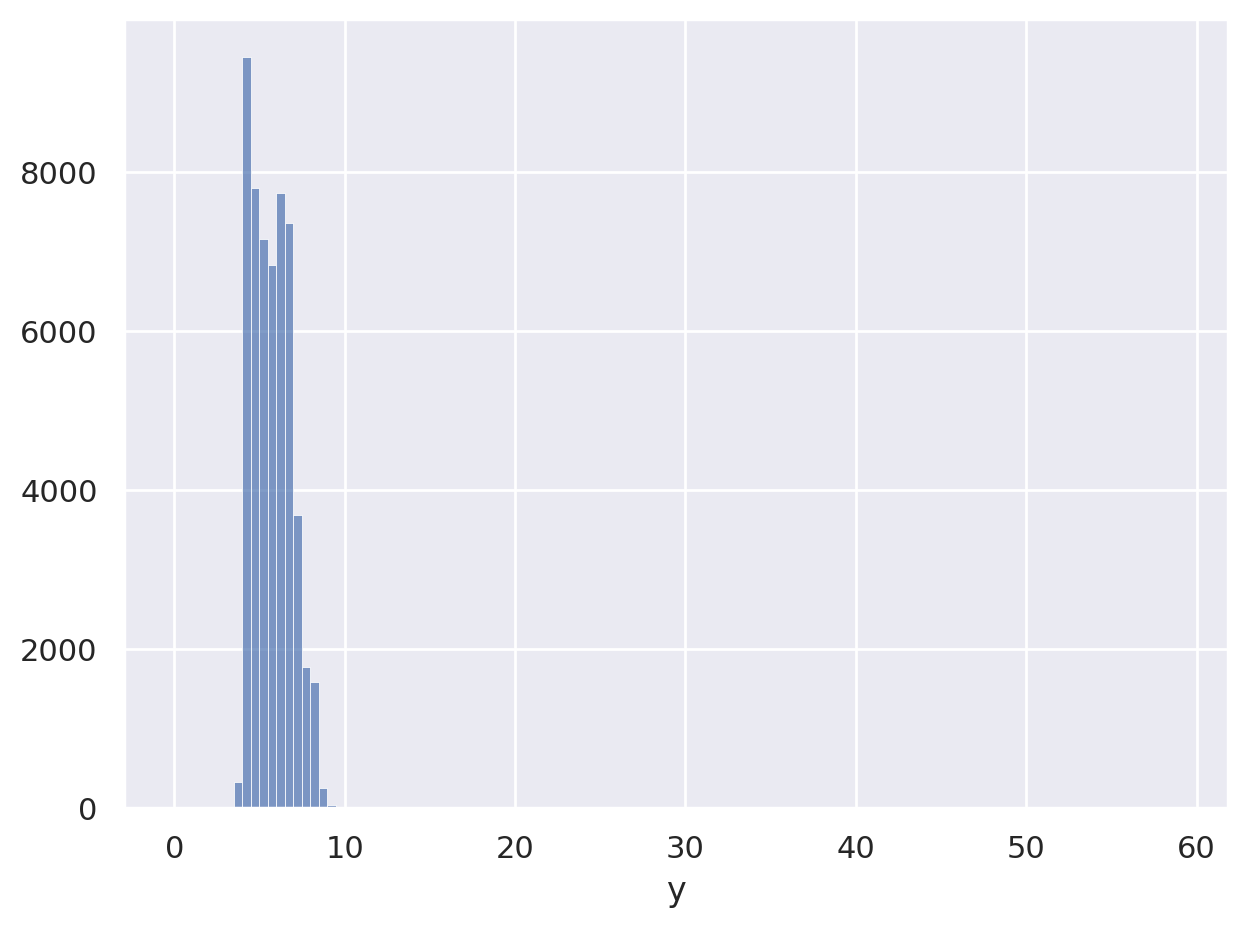

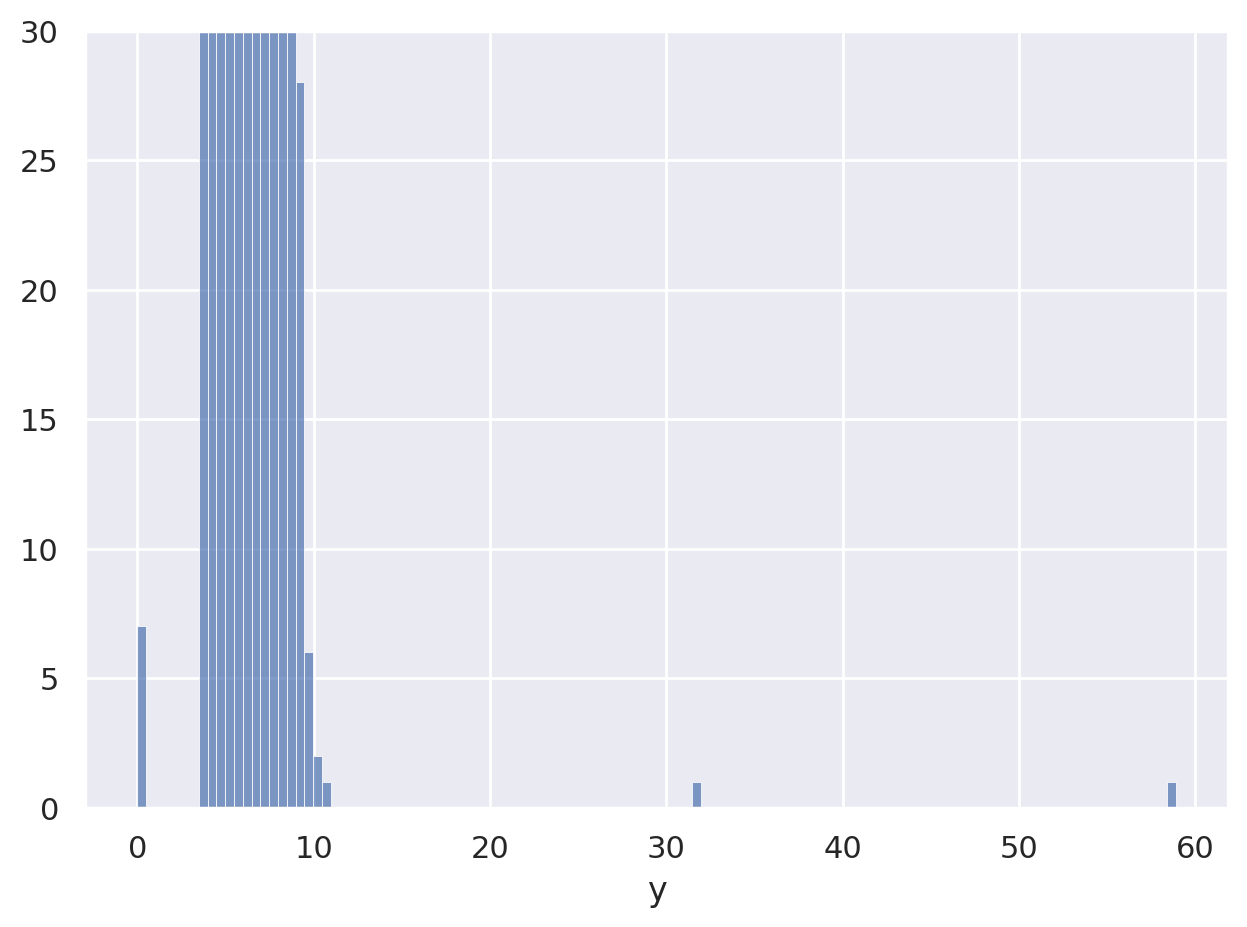

In [68]:
left = so.Plot(diamonds, x="y").add(so.Bars(), so.Hist(binwidth=.5)).show()
right = so.Plot(diamonds, x="y").add(so.Bars(), so.Hist(binwidth=.5)).limit(y=(0, 30)).show()


In [69]:
# --> y > 20인 경우 이상치
pd.options.display.max_rows = 0
unusual = (
    diamonds[["price", "x", "y", "z"]]
    .query('y < 3 | y > 20')
    .sort_values("y")
)
unusual

,price,x,y,z
11963,5139,0.00,0.00,0.00
15951,6381,0.00,0.00,0.00
24520,12800,0.00,0.00,0.00
26243,15686,0.00,0.00,0.00
27429,18034,0.00,0.00,0.00
49556,2130,0.00,0.00,0.00
49557,2130,0.00,0.00,0.00
49189,2075,5.15,31.80,5.12
24067,12210,8.09,58.90,8.06


### 도출 결과
#### 1. y > 20 이상이면 이상치이고, y < 3이면 이상치임 - 이상치에 해당하는 값 9개

## y 관련 이상치 처리 후 plot 진행

In [70]:
diamonds2 = diamonds.assign(
    y = lambda x: np.where((x.y < 3) | (x.y > 20), np.nan, x.y)
)

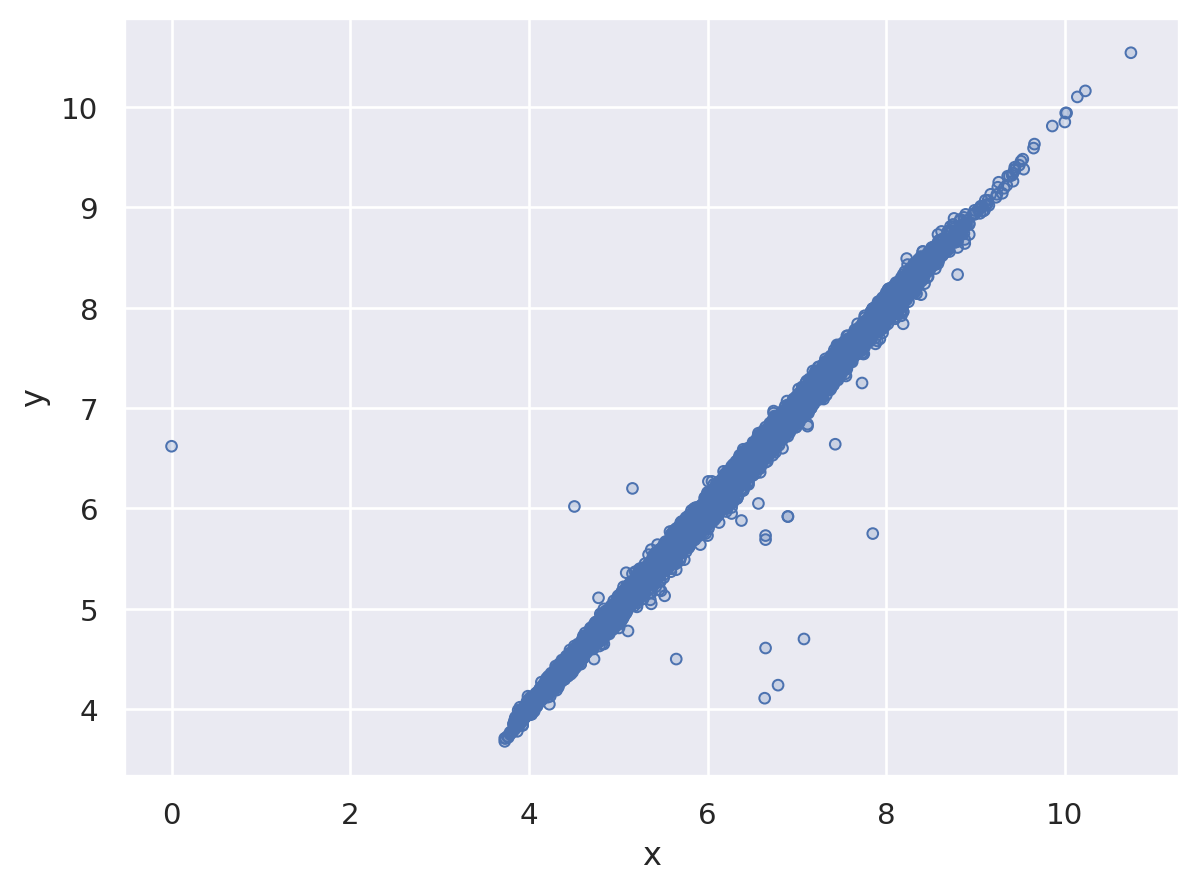

In [71]:
# NA의 제거에 대해 경고 없음!
(
    so.Plot(diamonds2, x="x", y="y")
    .add(so.Dots(alpha=1))
)

## cut에 따른 price 분포 분석

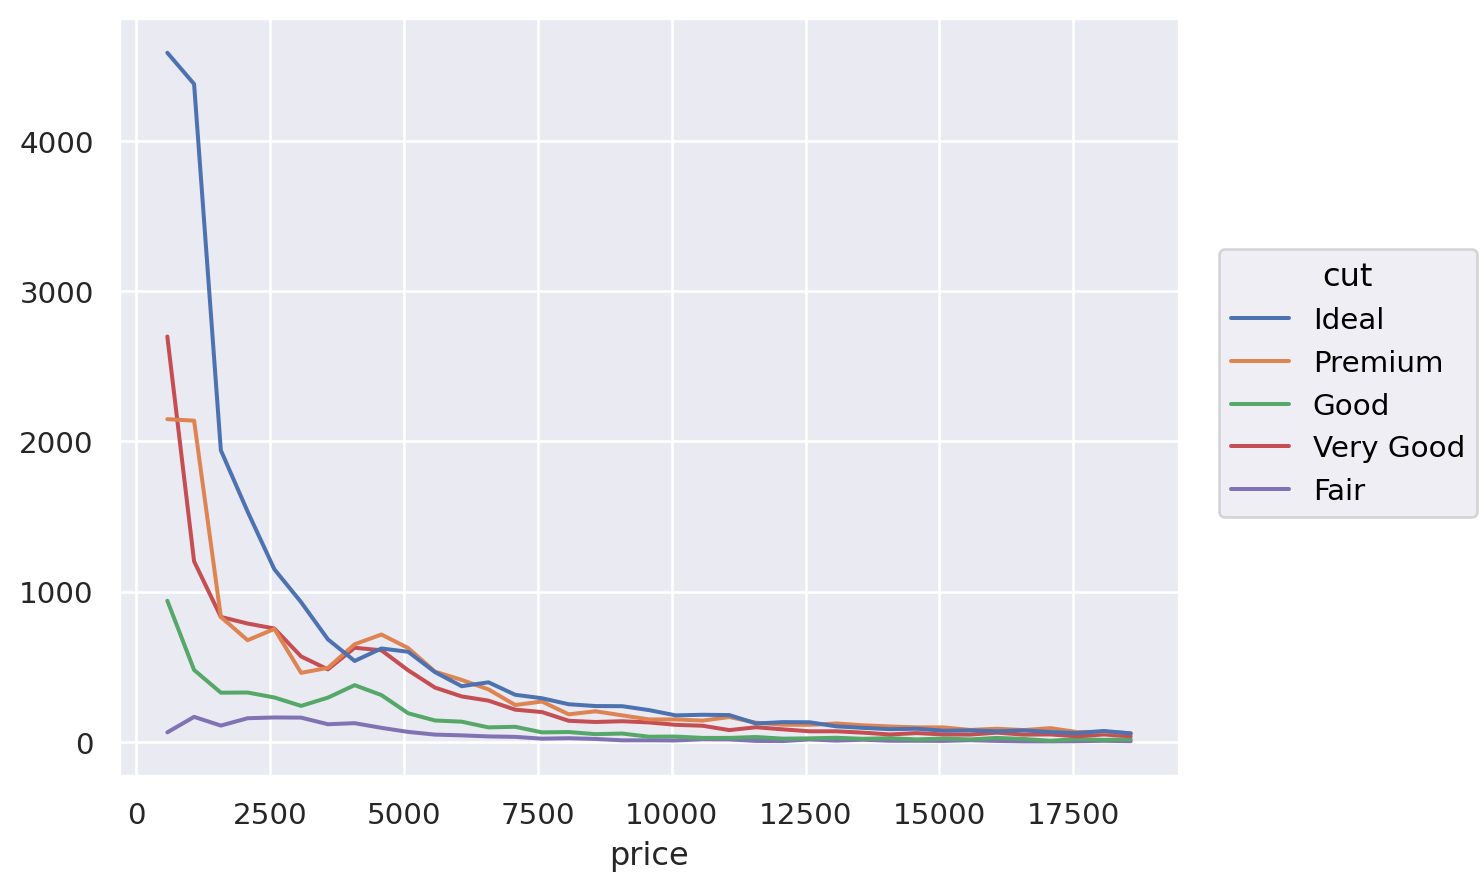

In [72]:
# 1
(
    so.Plot(diamonds, x = 'price', color = 'cut')
    .add(so.Line(), so.Hist(binwidth=500))
)

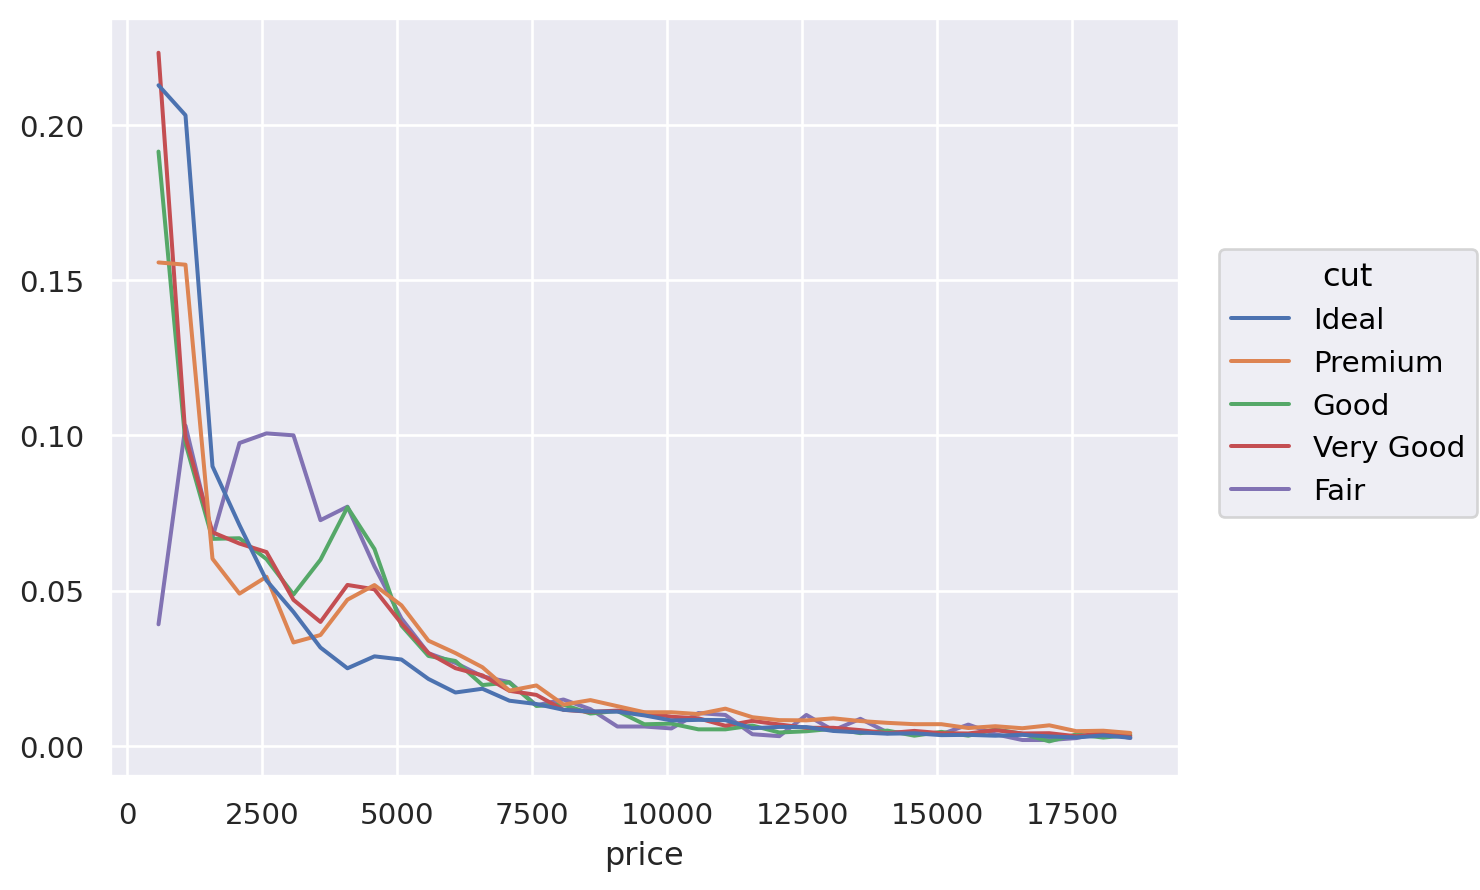

In [73]:
# 각 cut 내에서의 분포가 cut마다 어떻게 다른가 확인
(
    so.Plot(diamonds, x="price", color="cut")
    .add(so.Line(), so.Hist(binwidth=500, stat="proportion", common_norm=False))
)

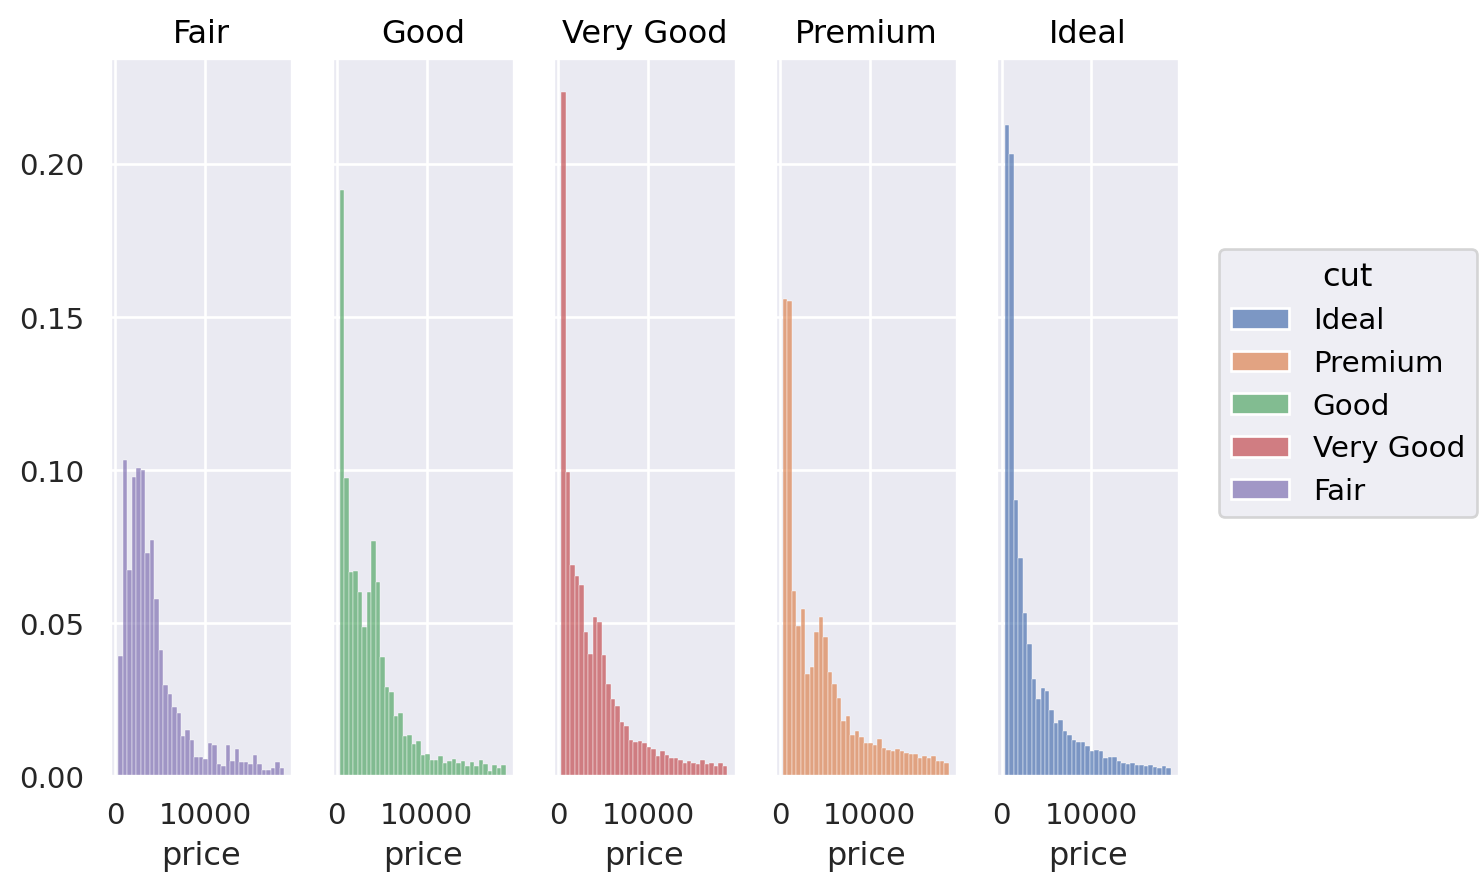

In [74]:
# 2
(
    so.Plot(diamonds, x="price", color="cut")
    .add(so.Bars(), so.Hist(binwidth=500, stat = 'proportion', common_norm = False))
    .facet('cut')
)

<Axes: xlabel='cut', ylabel='price'>

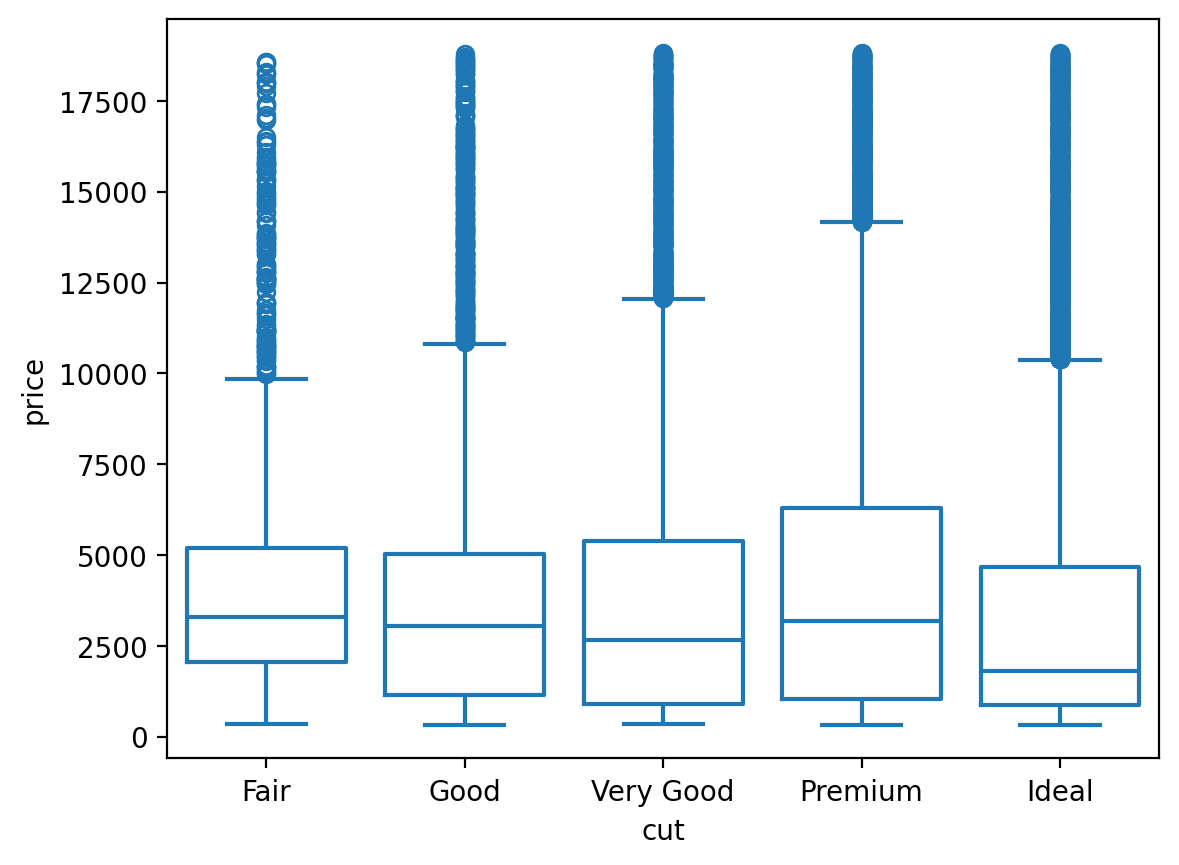

In [75]:
# 3
sns.boxplot(diamonds, x="cut", y="price", fill=False)

### 도출 결과
#### 1. cut이 좋은 게 더 많이 팔린다.
#### 2. 분포가 squid 데이터, 한 쪽에 치우쳐진 데이터
#### 3. 왜 fair 컷의 평균 가격이 가장 높은가? --> 다이아몬드 컷의 질이 낮을수록 평균 가격이 높은, 직관적으로 반대되는 패턴을 보임.

## cut, clarity 두 변수를 묶어서 분석

In [76]:
table_cut = diamonds.groupby(['cut', 'clarity']).size().reset_index(name='n')
table_cut

,cut,clarity,n
0,Fair,I1,210
1,Fair,SI2,466
2,Fair,SI1,408
3,Fair,VS2,261
4,Fair,VS1,170
5,Fair,VVS2,69
6,Fair,VVS1,17
7,Fair,IF,9
8,Good,I1,96
...,...,...,...


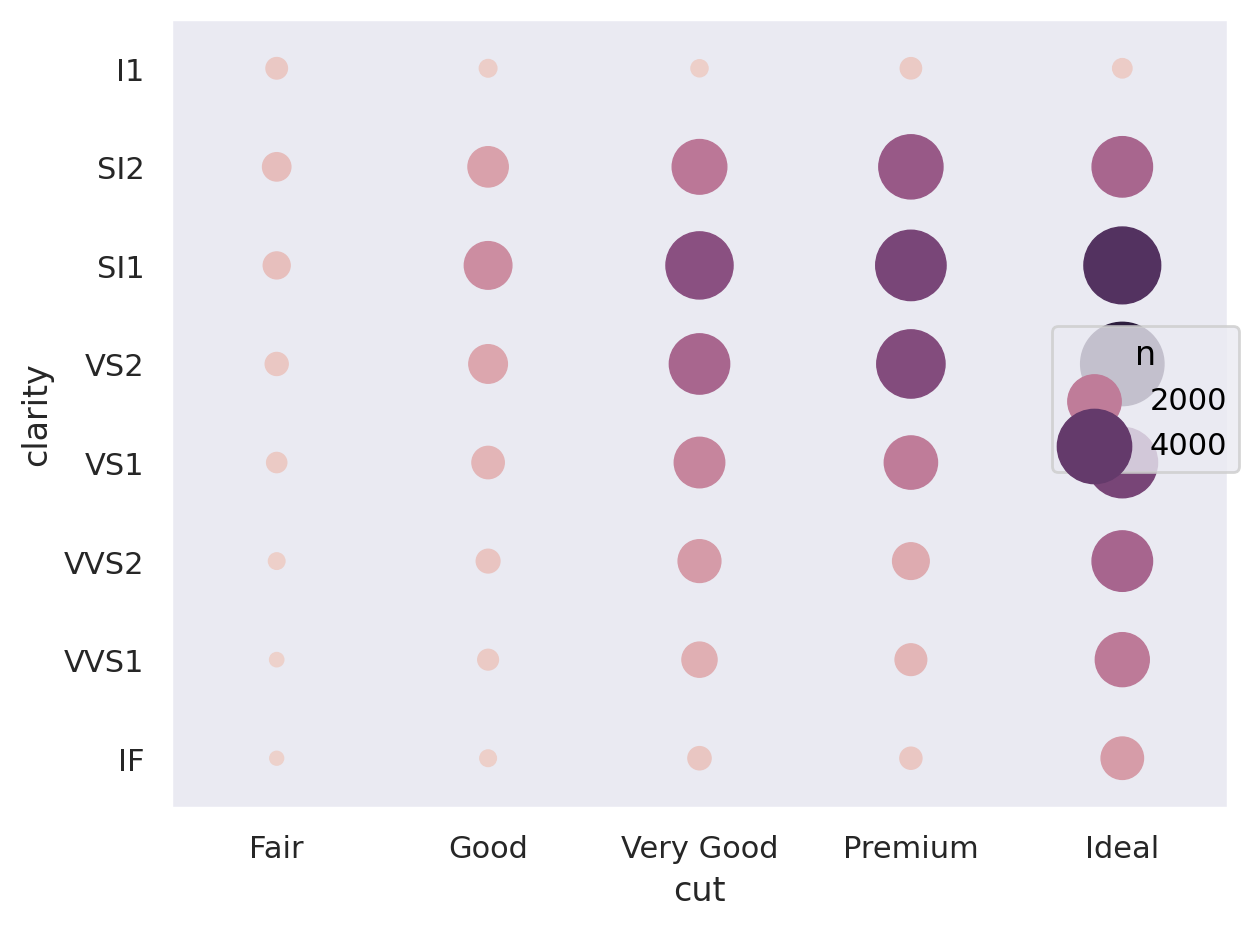

In [77]:
p1 = (
    so.Plot(table_cut, x = 'cut', y = 'clarity', pointsize = "n", color = "n")
    .add(so.Dot())
    .scale(pointsize=(5, 30))
).show()

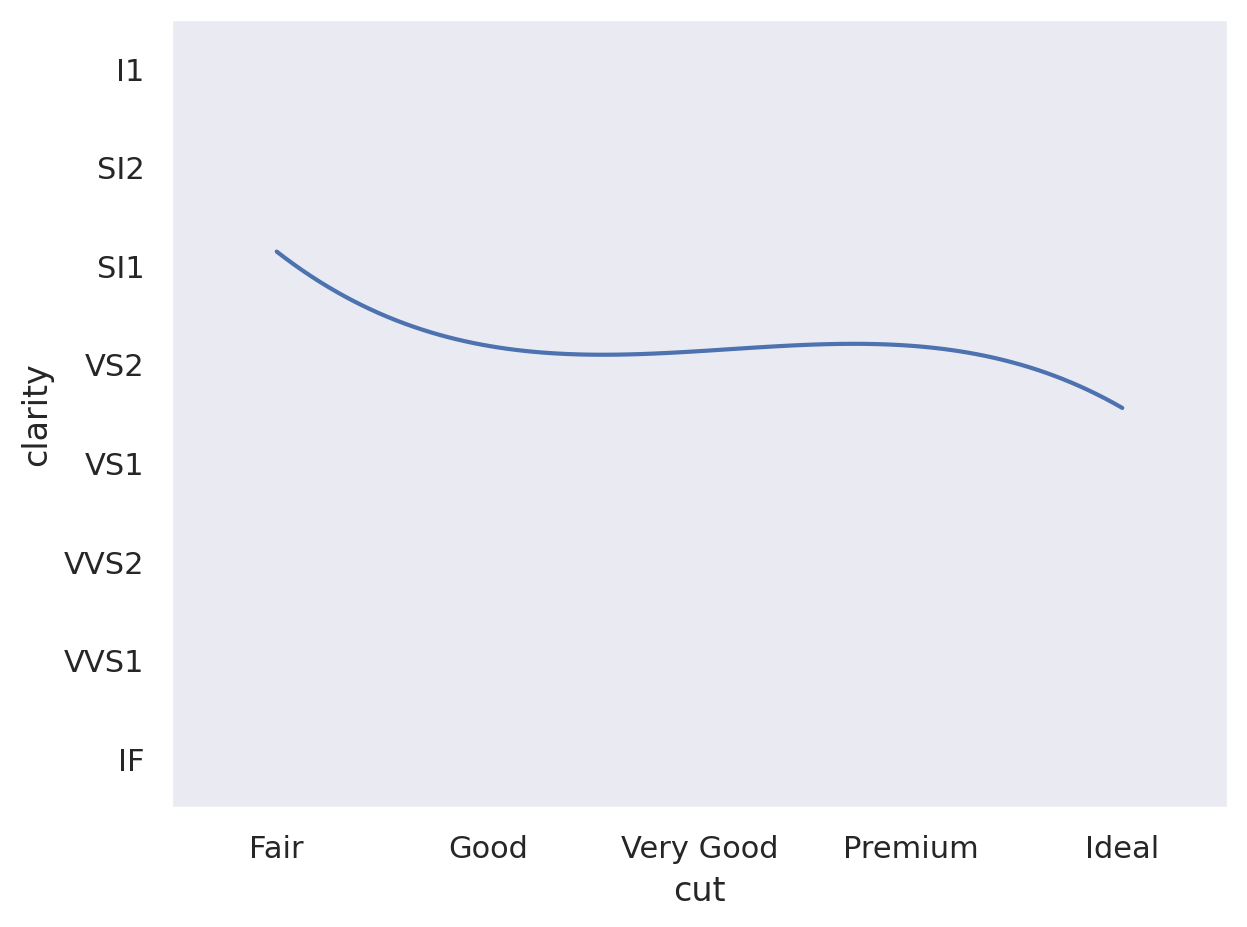

In [78]:
p2 = (
    so.Plot(diamonds, x = 'cut', y = 'clarity')
    .add(so.Line(), so.PolyFit(3))
).show()

### 도출 결과
#### --> 시각화를 통해서 아주 뚜렷하게 알 순 없다 (clear하지 않다.) 하지만 약한 상관관계를 맺는 것으로 보임.
##### 판단 기준: cut과 clarity가 관계가 있는지 확인하려면, cut을 알면 clarity 유추가 되는지? clarity를 알면 cut이 유추가 되는지? 뭐 이런 걸로 예측해봐라. (좋은 cut이면 clarity도 좋을까?)

## crosstab 사용해서 color에 cut 각각의 비율들을 구해 시각화

In [105]:
color_cut = pd.crosstab(diamonds["cut"], diamonds["color"]).stack().reset_index(name='n')
color_cut
# normalize='columns'을 하면 비율을 구하는 방향이 column / 그냥 하면
# 'columns': 비율을 구하는 방향

,cut,color,n
0,Fair,D,163
1,Fair,E,224
2,Fair,F,312
3,Fair,G,314
4,Fair,H,303
5,Fair,I,175
6,Fair,J,119
7,Good,D,662
8,Good,E,933
...,...,...,...


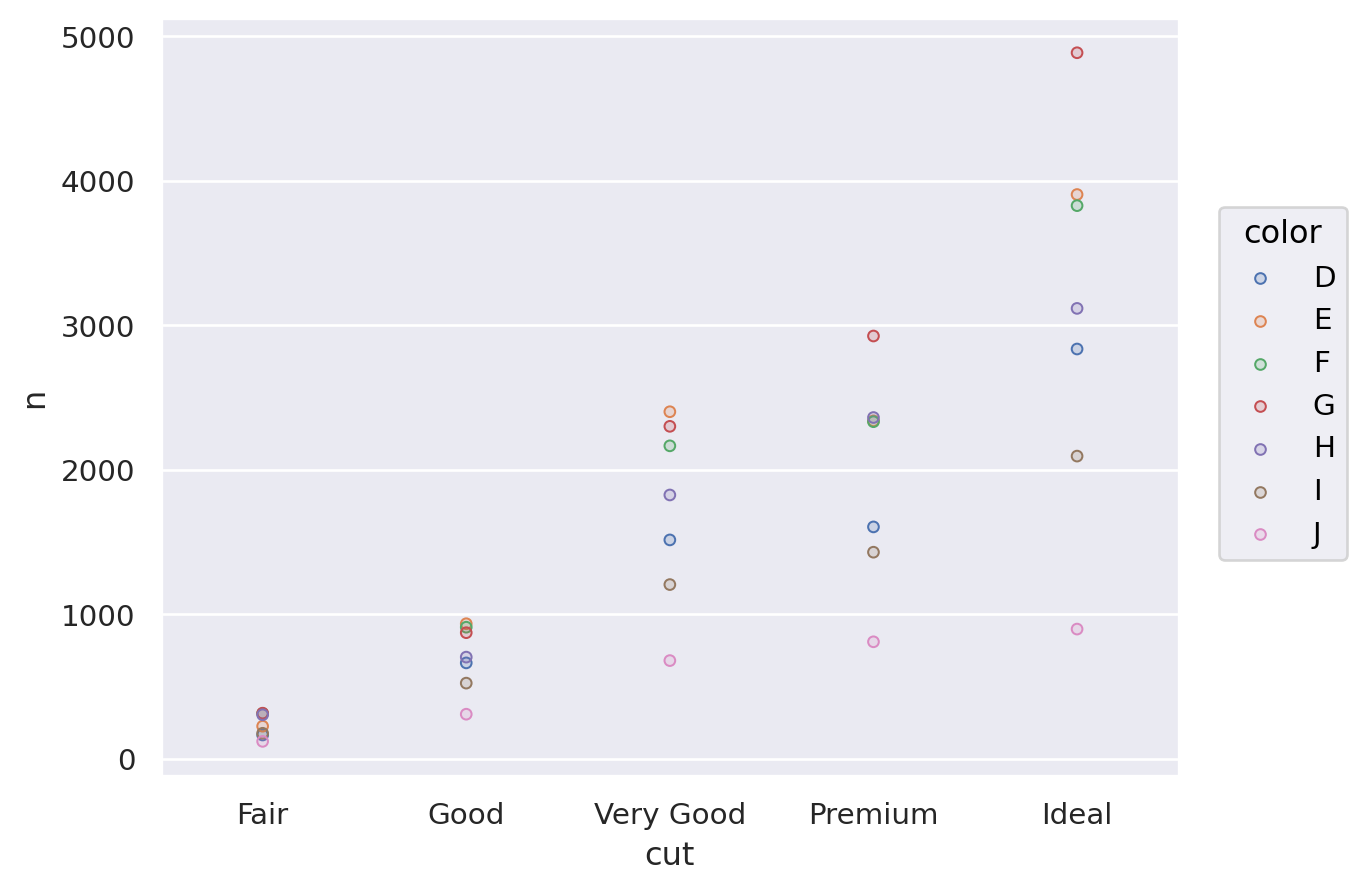

In [106]:
(
    so.Plot(color_cut, x= 'cut', y = 'n', color = 'color')
    .add(so.Dots())
)

## carat에 따른 price 분포 분석

### Line Plot

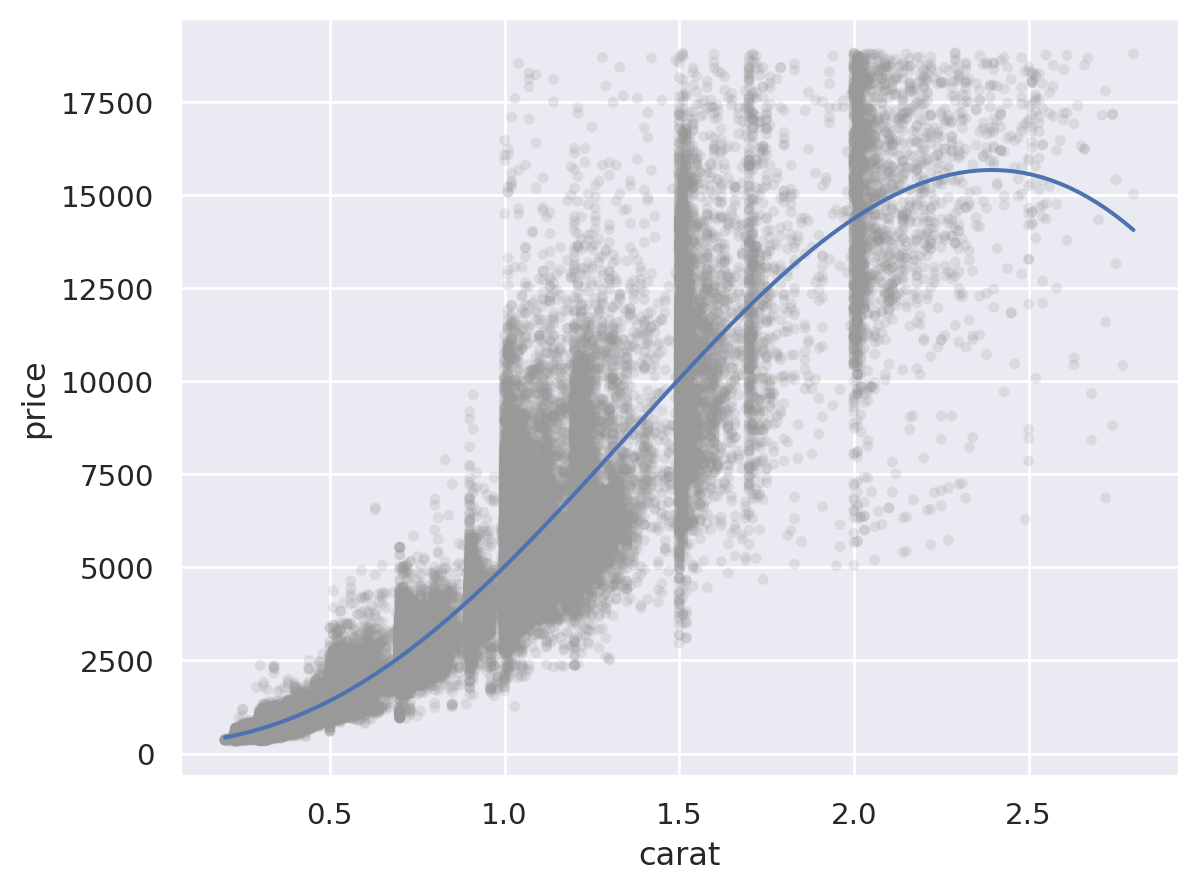

In [107]:
(
    so.Plot(diamonds.query('carat < 3'), x = 'carat', y = 'price')
    .add(so.Dots(alpha = 1/100, color = '.6'))
    .add(so.Line(), so.PolyFit(5))
)

### joint plot

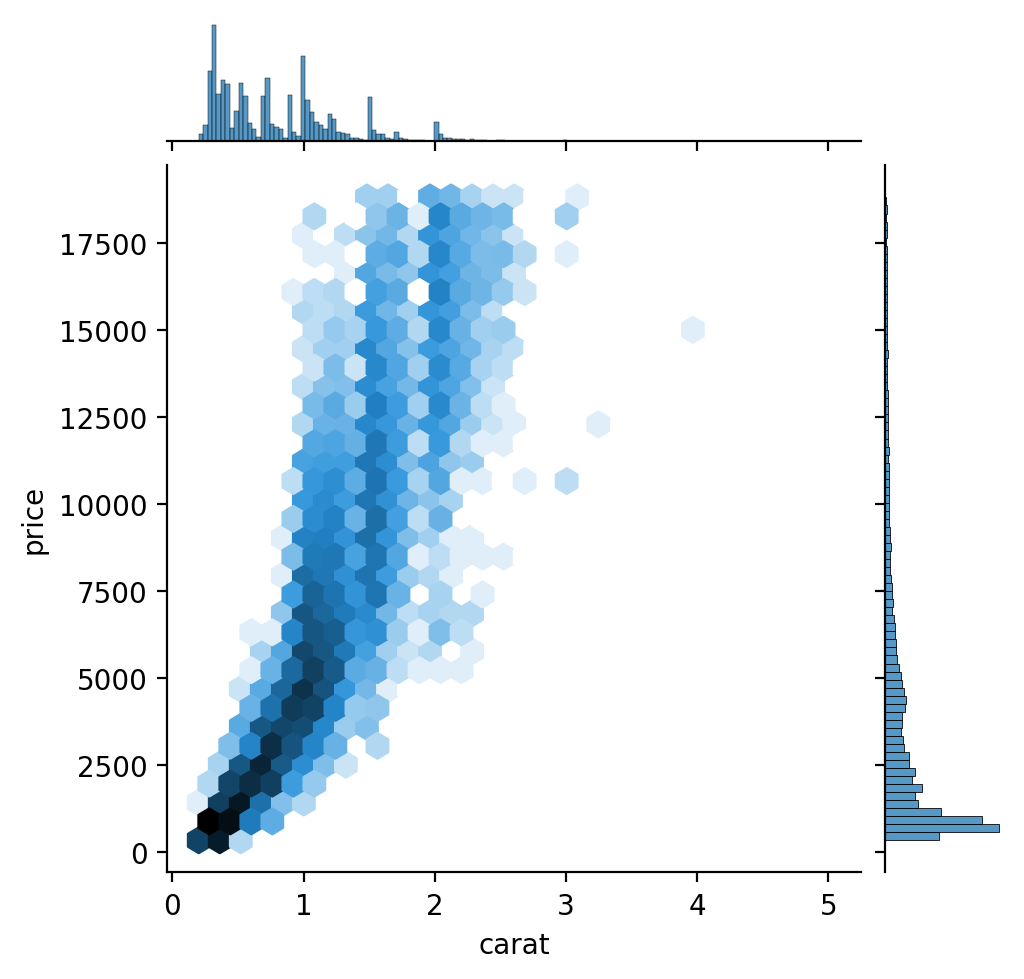

In [108]:
# 2d-histogram
from matplotlib.colors import LogNorm

sns.jointplot(diamonds, x="carat", y="price", kind="hex", gridsize=30, height=5, norm=LogNorm())  # gridsize: bin 개수
plt.show()

# 진할수록 데이터가 많음

### cut, qcut 함수로 연속 변수를 카테고리화 후 boxplot

In [112]:
# 캐럿 구간 쪼개서 카테고리로 만든다.
diamonds_cat = diamonds.query('carat < 3').assign(
    carat_cat = lambda x:pd.cut(x.carat, 20, labels=False),
    carat_qcat = lambda x:pd.qcut(x.carat, 20, labels=False)
    )

<Axes: xlabel='carat_cat', ylabel='price'>

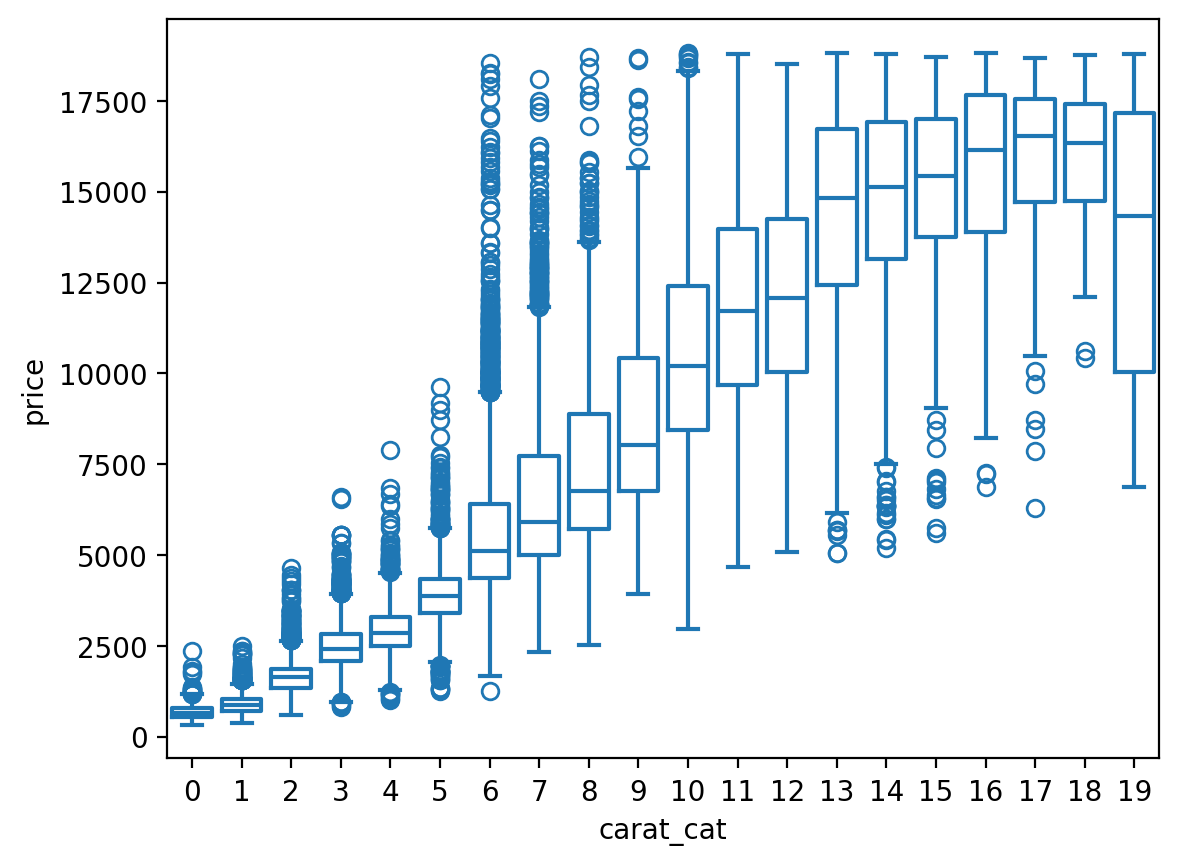

In [113]:
sns.boxplot(diamonds_cat, x="carat_cat", y="price", fill=False)

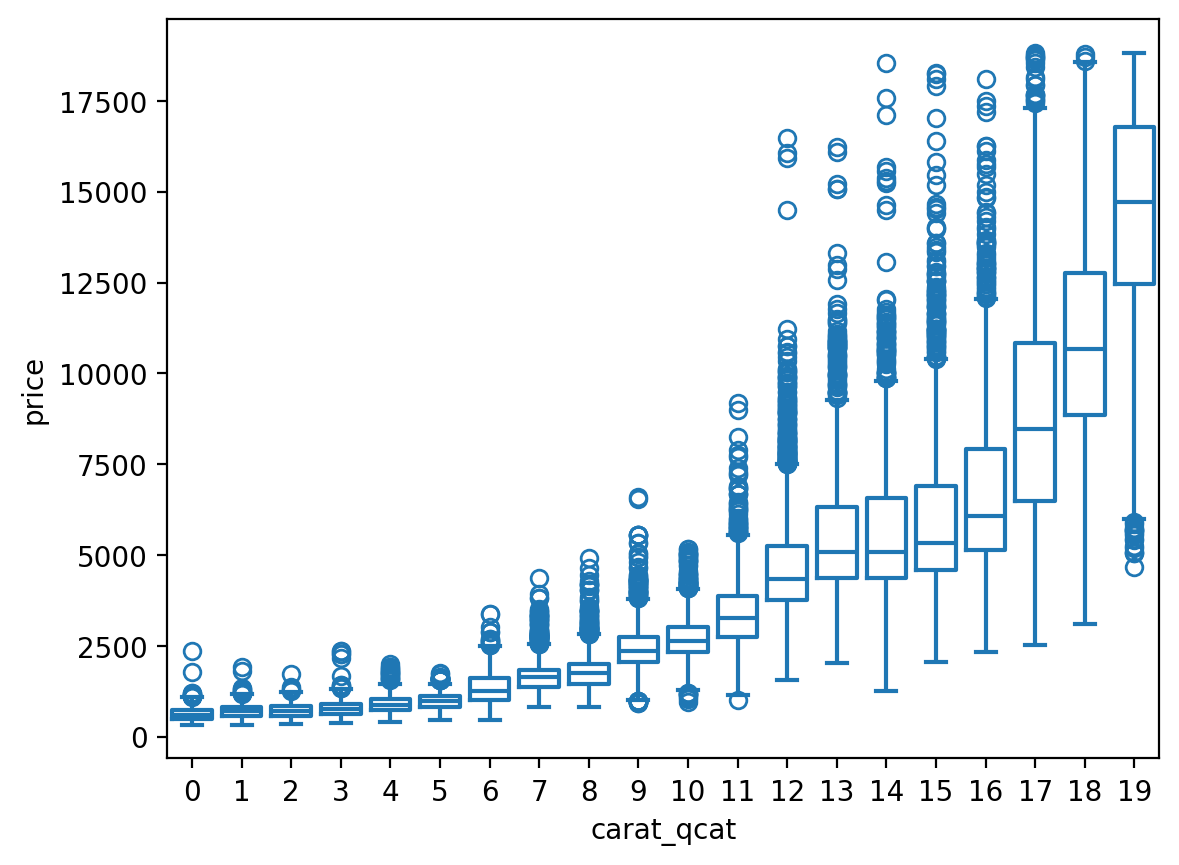

In [114]:
sns.boxplot(diamonds_cat, x="carat_qcat", y="price", fill=False)

## cut과 carat의 관계

<Axes: xlabel='cut', ylabel='carat'>

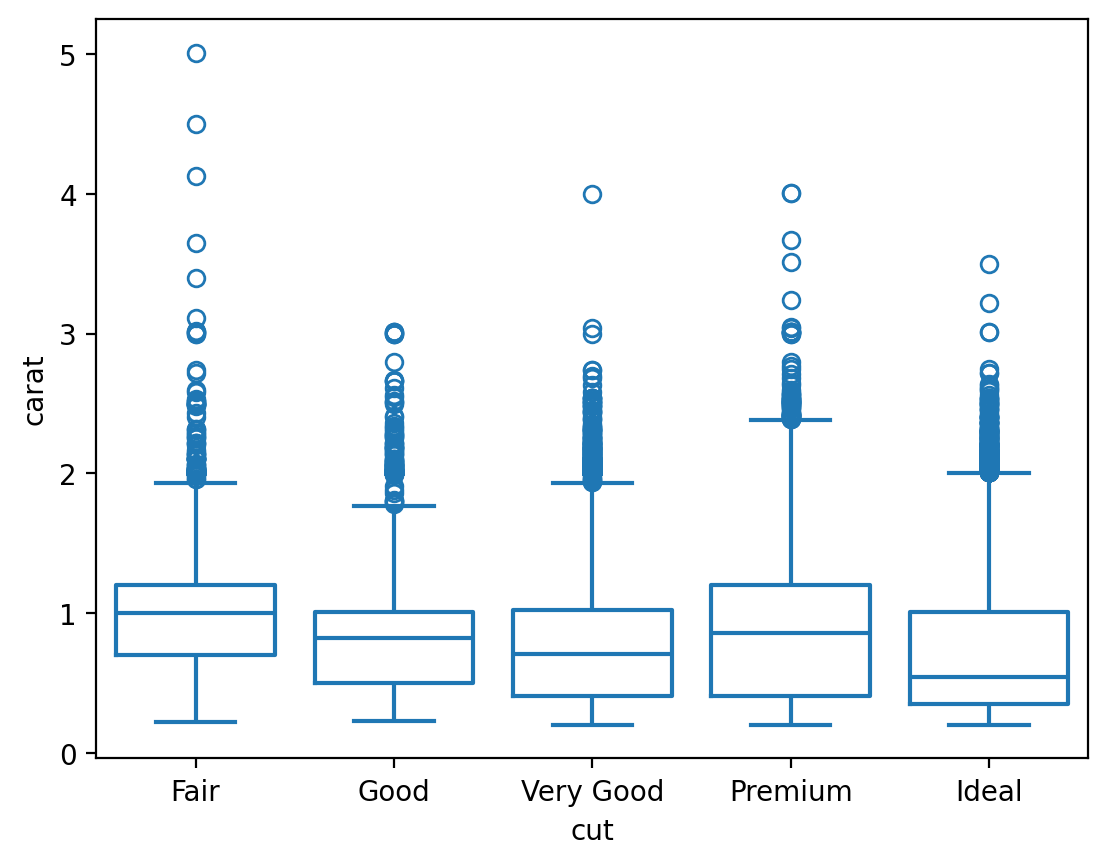

In [124]:
# 1.
sns.boxplot(diamonds, x="cut", y="carat", fill=False)

### 도출 결과
#### cut이 높아지면 carat이 작아지고, carat이 작아지니 가격도 떨어짐
#### 컷(cut)과 가격(price)의 관계는 예상과 달랐는데, 이는 컷(cut)과 무게(carat), 무게(carat)와 가격(price) 사이에 깊은 관계가 있었기 때문임.


## 잔차

### 잔차 구하기
####residuals (잔차)은 모형이 예측하지 못하는 정도를 나타내며, 그것들의 총체를 줄이는 것이 좋은 모형임.

In [125]:
import statsmodels.formula.api as smf

diamonds2 = diamonds.query("carat < 3")
diamonds_fit = smf.ols("price ~ carat", data=diamonds2).fit()

diamonds2 = diamonds2.assign(
    pred=diamonds_fit.fittedvalues,
    resid=diamonds_fit.resid,
)

np.random.seed(126)
diamonds2[["cut", "carat", "price", "pred", "resid"]].sample(7)

# 실제는 초반에 빠르게 오르고, 후반에 느리게 오르는데, 우리 모델에선 직선으로 예측
# 잔차: pred - resid

,cut,carat,price,pred,resid
32609,Ideal,0.31,802,117.54,684.46
16255,Ideal,1.35,6502,8263.21,-1761.21
17451,Ideal,1.01,6999,5600.20,1398.80
16089,Good,1.01,6429,5600.20,828.80
42762,Premium,0.56,1345,2075.63,-730.63
26768,Good,2.02,16593,13510.90,3082.10
47809,Very Good,0.71,1902,3250.49,-1348.49


In [126]:
print(diamonds_fit.params)  # print coefficients
print(f"R2 = {diamonds_fit.rsquared:.3f}")  # print R-squared
# 1 캐럿 증가하면 가격이 7832불 정도 올라간다.

Intercept   -2310.50
carat        7832.37
dtype: float64
R2 = 0.853


### 다른 변수들과의 관계를 탐구
#### 크기(carat)로 가격(price)을 예측/설명(account for)하는 정도를 제거한 후, 즉, 크기(carat)로 예측/설명되지 않는 가격(price)의 정도에 대해서 다른 변수들과의 관계를 탐구

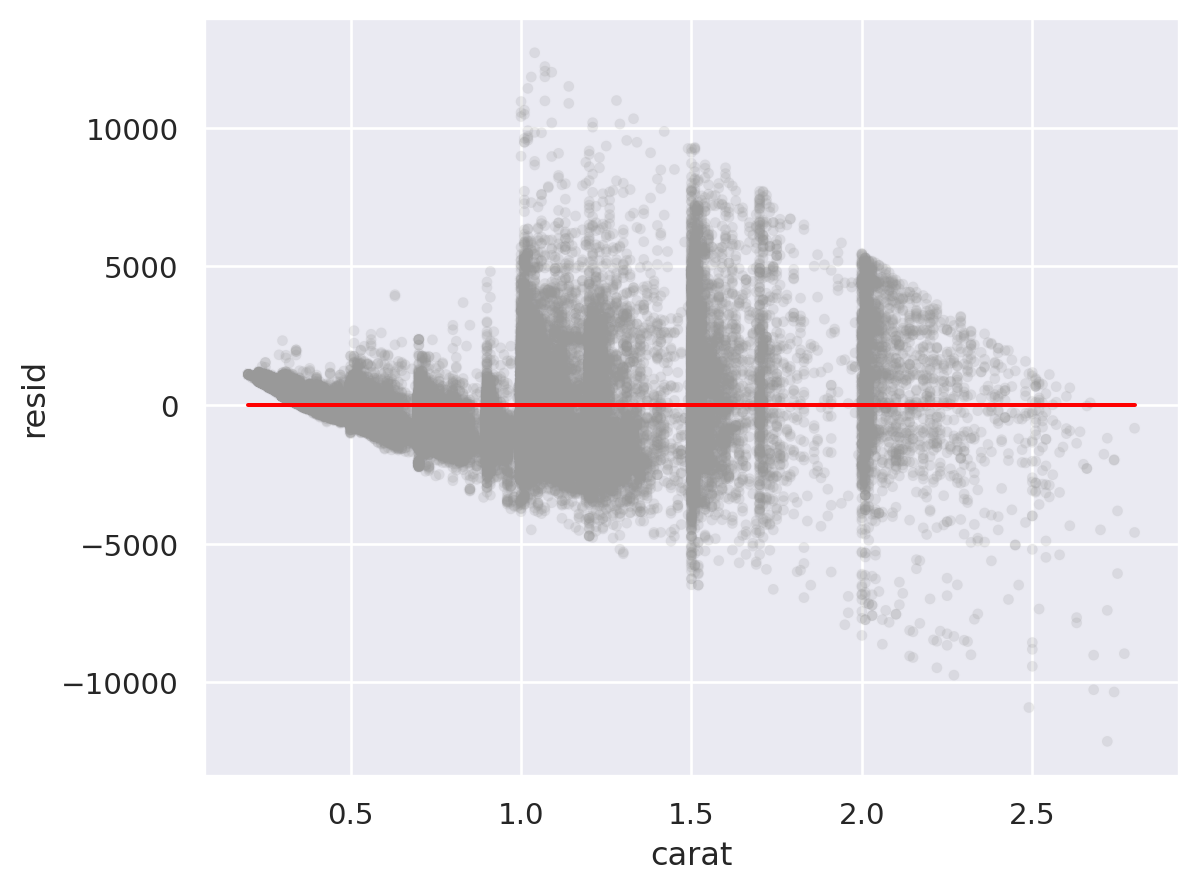

In [127]:
(
    so.Plot(diamonds2, x='carat', y='resid')
    .add(so.Dots(color=".6", alpha=1/100))
    .add(so.Line(color="red"), so.Agg(lambda x: 0))
)

# y축에 잔차를 놓고 보는 게 잔차의 분포가 정확히 보여서 좋다.
# 잔차도 패턴이 나타난다. 자료에서의 점선이 잔차의 패턴인데, 좋지 않다.
# 왜냐하면, 잔차에서 패턴이 보인다는 건 저 모델이 데이터를 잘 나타내지 못한다는 걸 반증하게 된다.

<Axes: xlabel='cut', ylabel='resid'>

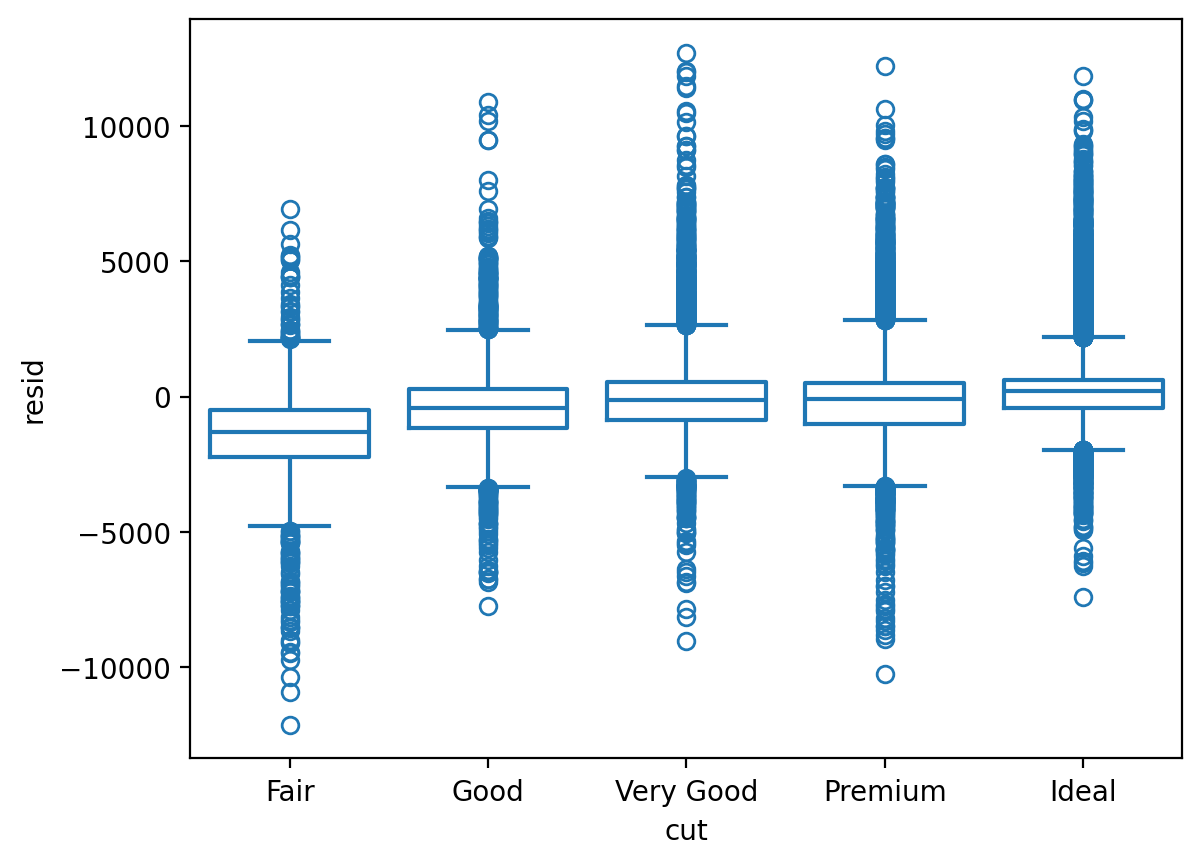

In [128]:
sns.boxplot(diamonds2, x="cut", y="resid", fill=False)
# cut으로 carot으로 설명되지 않는 가격의 값들을 설명 가능해진다.

### 도출 결과
#### 다이아몬드의 무게(carat)가 동일하다면, 즉 무게가 고정된다면 (hold it constant), 무게의 영향이 제거된 다이아몬드의 퀄리티(cut, …)에 따른 가격에 대한 관계가 나타날 것임.

# 논외

## 카테고리의 순서가 존재하지 않아 중앙값 순으로 정렬하고자 할 때

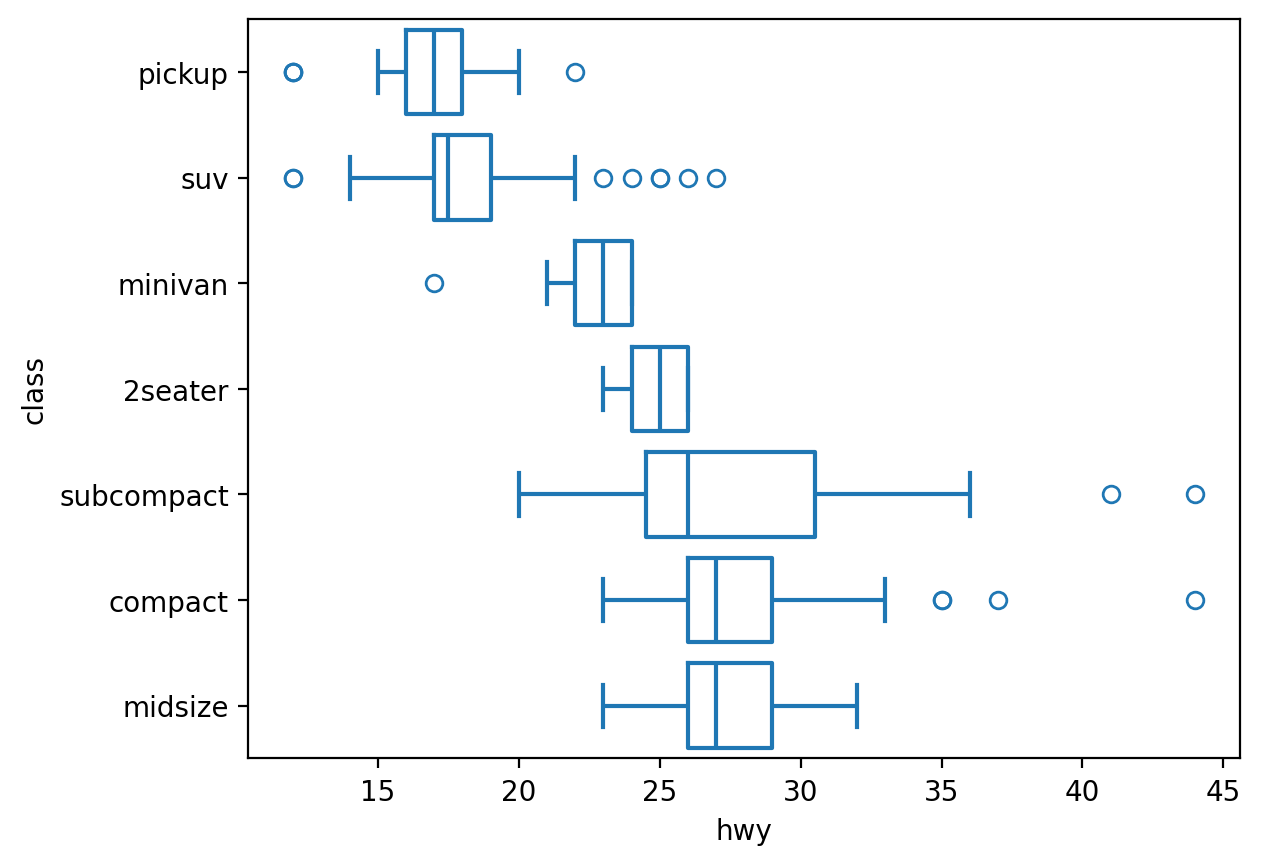

In [87]:
mpg = sm.datasets.get_rdataset("mpg", "ggplot2").data
hwy_order = mpg.groupby("class")["hwy"].median().sort_values().index

sns.boxplot(mpg, y="class", x="hwy", fill=False, order=hwy_order)
plt.show()

## Wide format 변환

In [83]:
gapminder = sm.datasets.get_rdataset("gapminder", "gapminder").data
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.80,8425333,779.45
1,Afghanistan,Asia,1957,30.33,9240934,820.85
2,Afghanistan,Asia,1962,32.00,10267083,853.10
3,Afghanistan,Asia,1967,34.02,11537966,836.20
4,Afghanistan,Asia,1972,36.09,13079460,739.98
5,Afghanistan,Asia,1977,38.44,14880372,786.11
6,Afghanistan,Asia,1982,39.85,12881816,978.01
7,Afghanistan,Asia,1987,40.82,13867957,852.40
8,Afghanistan,Asia,1992,41.67,16317921,649.34
...,...,...,...,...,...,...


In [84]:
plotdata = (
    gapminder
    .query('continent == "Asia"')
    .pivot(index="country", columns="year", values="lifeExp")  # wide format 변환
)
plotdata

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Afghanistan,28.80,30.33,32.00,34.02,36.09,38.44,39.85,40.82,41.67,41.76,42.13,43.83
Bahrain,50.94,53.83,56.92,59.92,63.30,65.59,69.05,70.75,72.60,73.92,74.80,75.64
Bangladesh,37.48,39.35,41.22,43.45,45.25,46.92,50.01,52.82,56.02,59.41,62.01,64.06
Cambodia,39.42,41.37,43.41,45.41,40.32,31.22,50.96,53.91,55.80,56.53,56.75,59.72
China,44.00,50.55,44.50,58.38,63.12,63.97,65.53,67.27,68.69,70.43,72.03,72.96
"Hong Kong, China",60.96,64.75,67.65,70.00,72.00,73.60,75.45,76.20,77.60,80.00,81.50,82.21
India,37.37,40.25,43.60,47.19,50.65,54.21,56.60,58.55,60.22,61.77,62.88,64.70
Indonesia,37.47,39.92,42.52,45.96,49.20,52.70,56.16,60.14,62.68,66.04,68.59,70.65
Iran,44.87,47.18,49.33,52.47,55.23,57.70,59.62,63.04,65.74,68.04,69.45,70.96


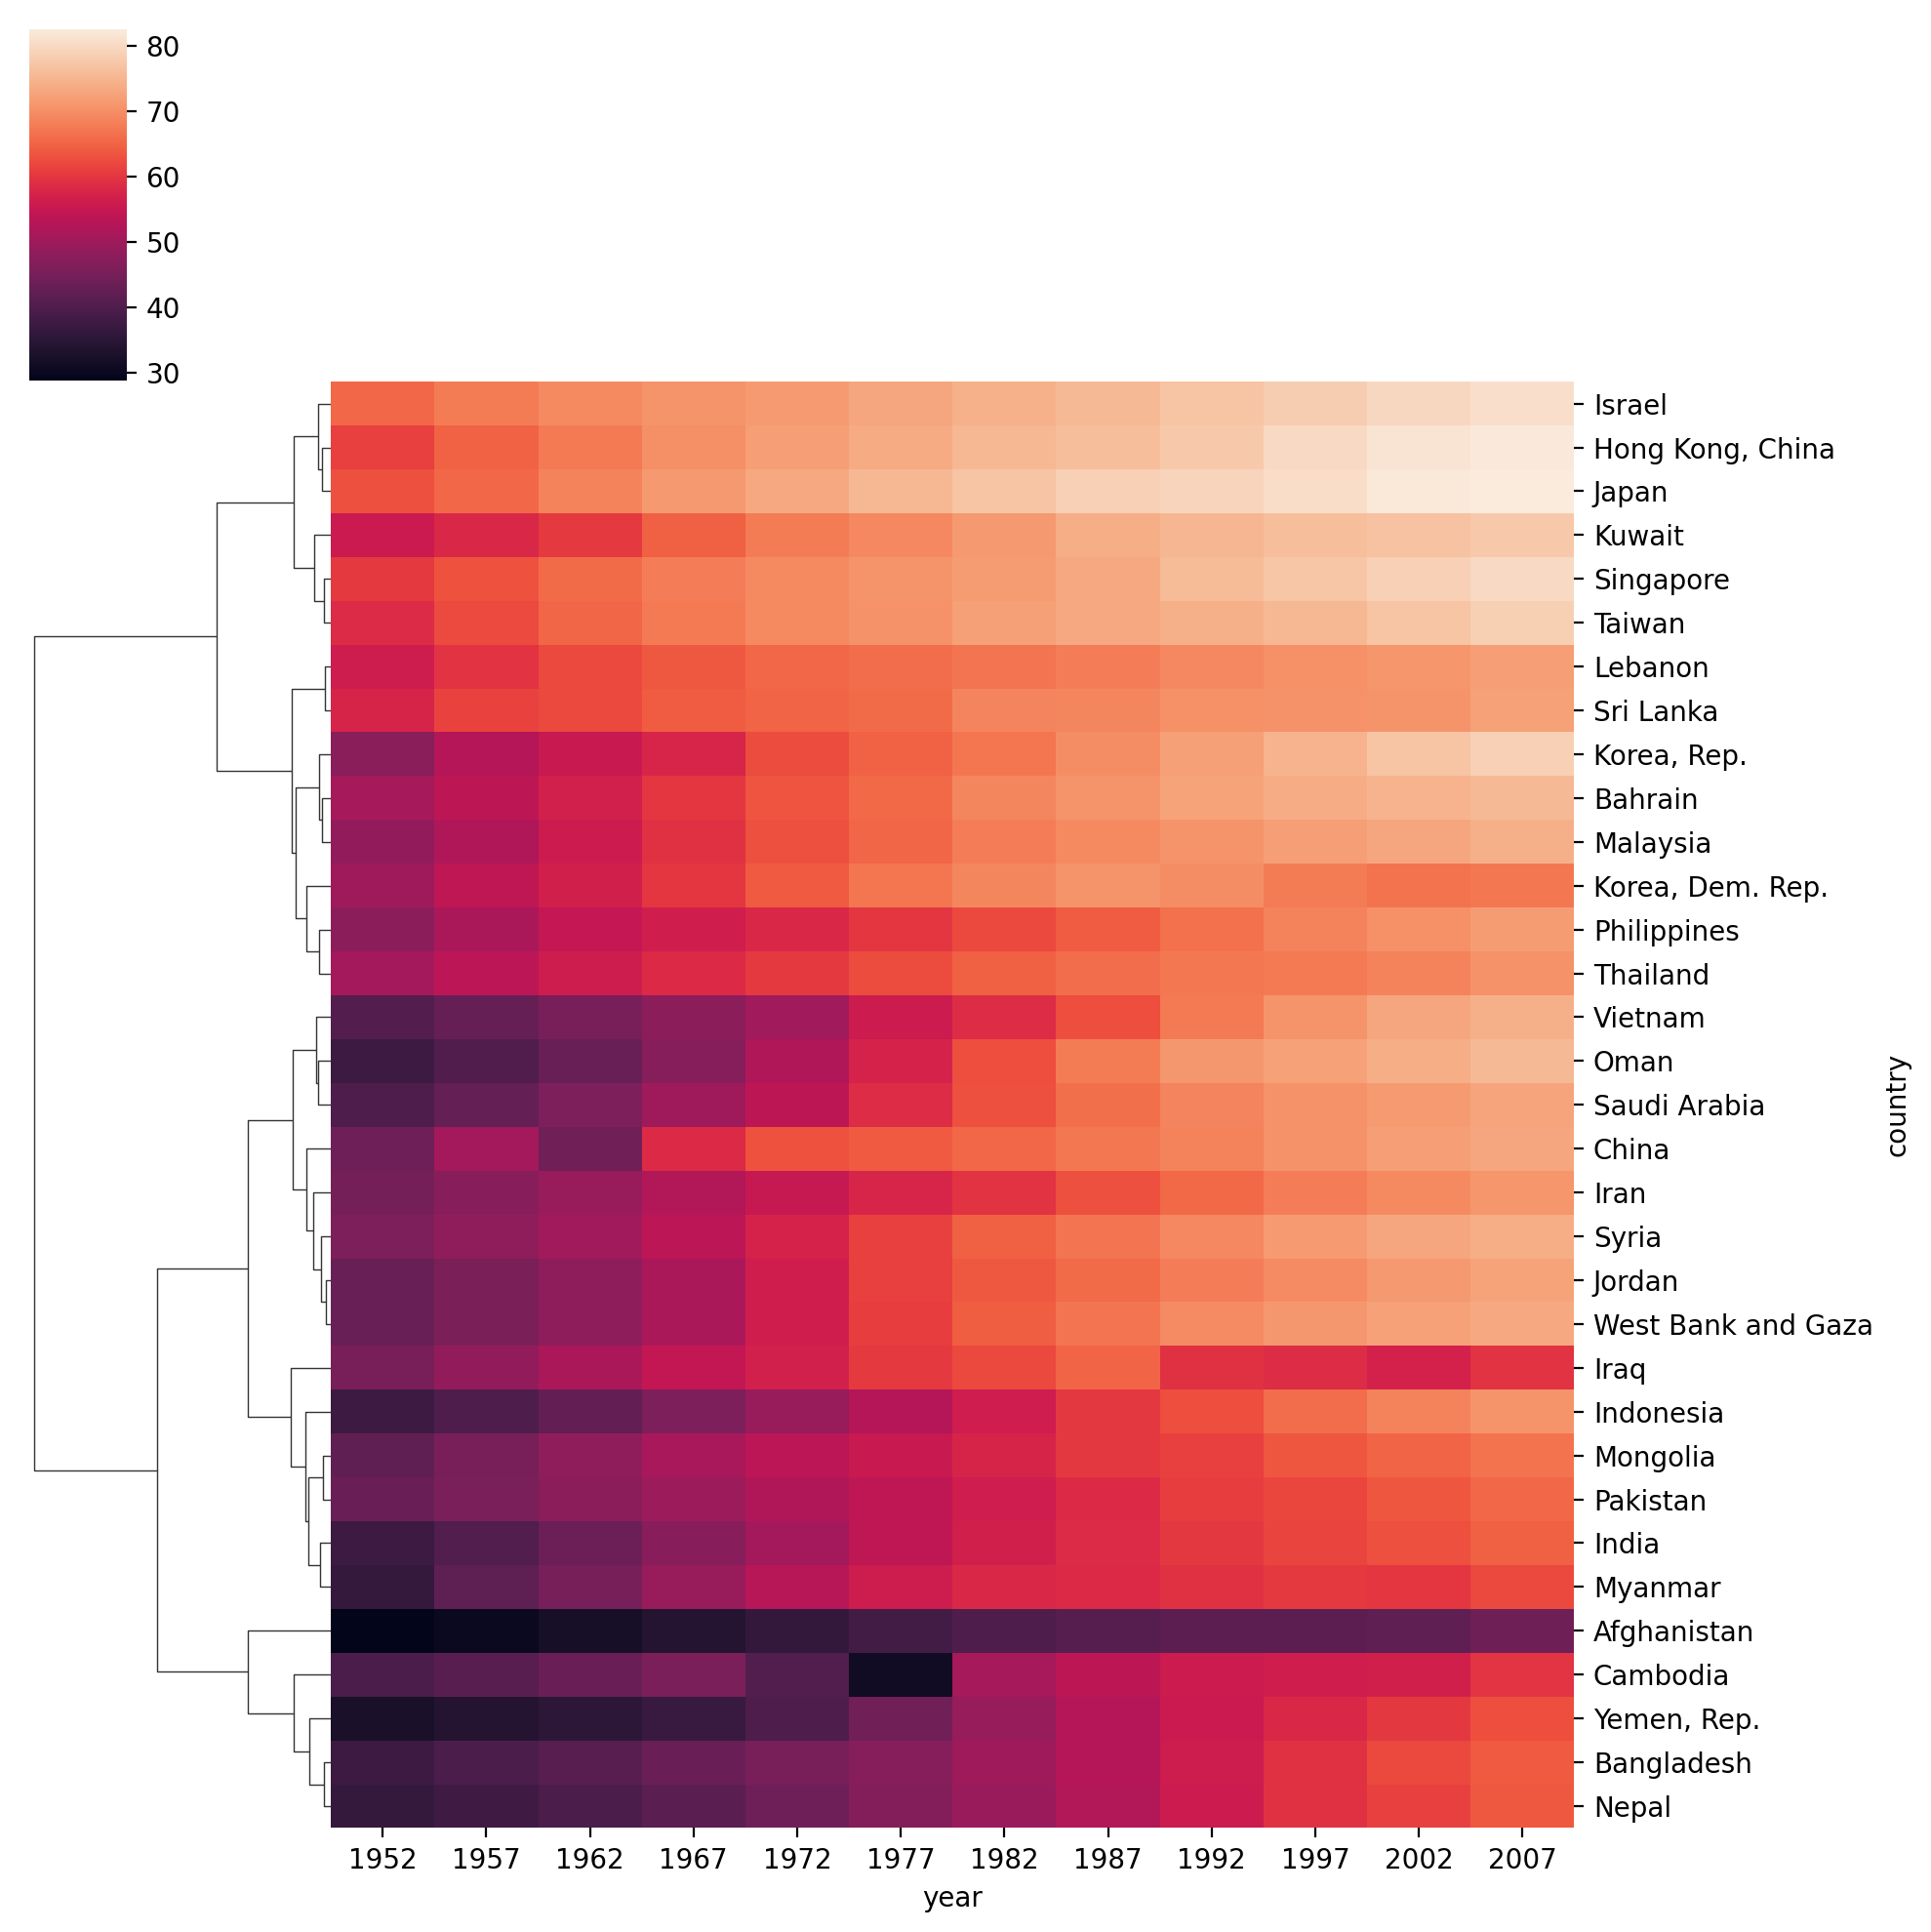

In [85]:
# hierarchical clustering in scipy
sns.clustermap(plotdata, col_cluster=False, method="ward")
plt.show()  # 생략

## 패턴 분석

In [122]:
faithful = sm.datasets.get_rdataset("faithful", "datasets").data
faithful.head(3)

,eruptions,waiting
0,3.60,79
1,1.80,54
2,3.33,74


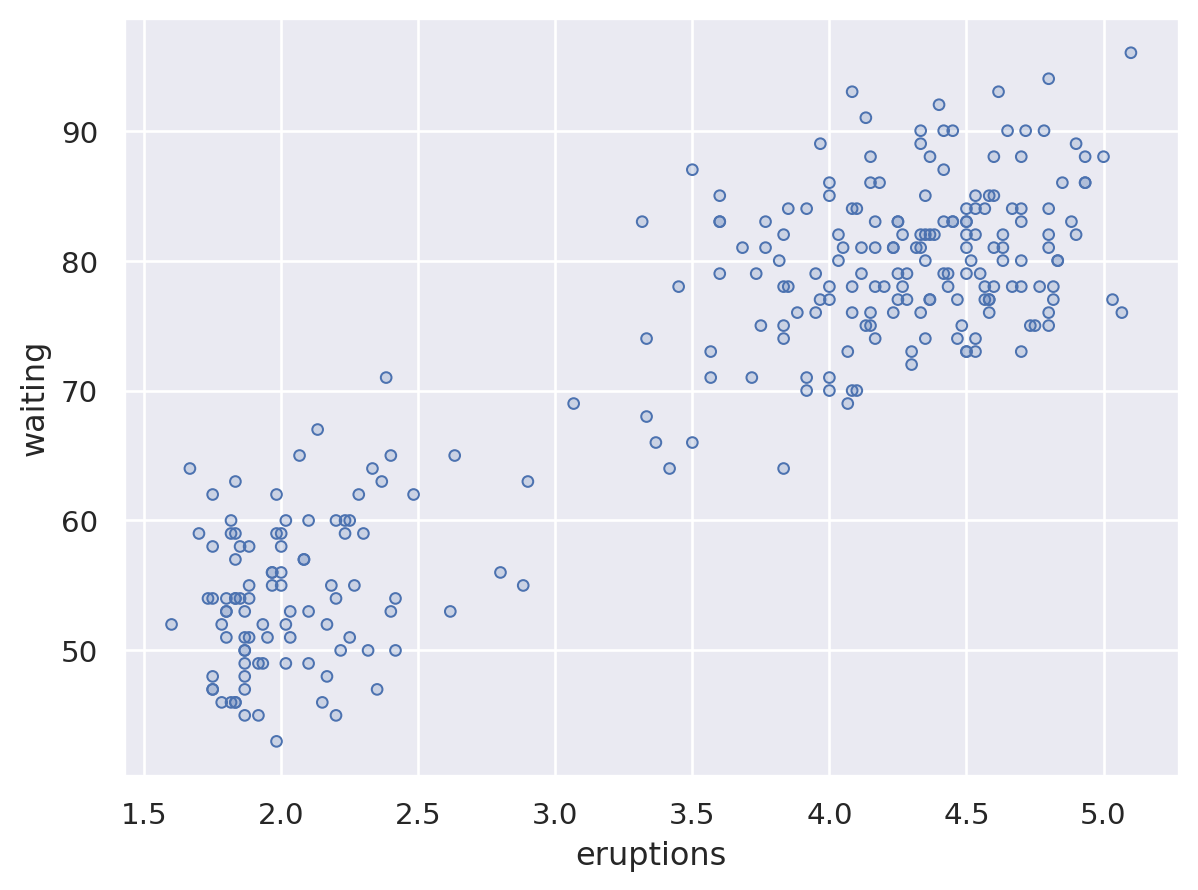

In [123]:
# 1.
(
    so.Plot(faithful, x='eruptions', y='waiting')
    .add(so.Dots())
)
# 모델링하기 힘든 케이스: 정규분포가 아님

### 도출 결과
#### 1. 패턴: 오래 있다가 분출할수록 더 오랜 기간 분출 / 2개의 군집 형성